# Neural Networks Using Only Numpy

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
import numpy as np

from neuralnet.neuralnet import NeuralNet
from neuralnet.optimizers import GradientDescent
from neuralnet.activations import Sigmoid
from neuralnet.initializers import standard_gaussian
from neuralnet.losses import MSE
from neuralnet.utils import split

In [3]:
# read data and prepare
encode = {'setosa':[1,0,0],'versicolor':[0,1,0],'virginica':[0,0,1]}
with open('iris.csv','r',newline='\n') as f:
    data = f.readlines()
columns = data[0]
del data[0]

data = np.array([x.split(',') for x in data])
X = data[:,:4].astype(float)
y = np.array([encode[x.replace('\n','')] for x in data[:,4]])
print(X.shape,y.shape)

(150, 4) (150, 3)


In [4]:
# shuffle
idx = np.arange(X.shape[0])
np.random.seed(123)
np.random.shuffle(idx)
X,y = X[idx], y[idx]

In [5]:
# split for training, validation, and test
ratios = [0.7,0.15,0.15]
X_train, X_valid, X_test = split(X,ratios)
y_train, y_valid, y_test = split(y,ratios)

In [6]:
# create optimizer and neural network object
opt = GradientDescent(loss=MSE(),
                      activation=Sigmoid(),
                      learning_rate=0.05)

nn = NeuralNet(hidden=[5],
               initializer=standard_gaussian,
               optimizer=opt)

In [7]:
# train and update paramaters given data
nn.train(X,y,epoch=500,batch_size=4,val_X=X_valid,val_y=y_valid,seed=123)

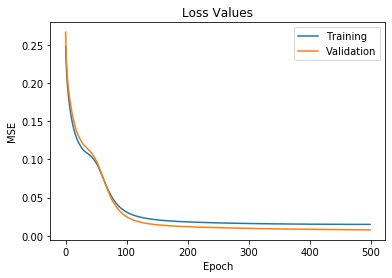

In [8]:
plt.plot(nn.training_error,label='Training')
plt.plot(nn.validation_error,label='Validation')
plt.title('Loss Values')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.legend()
plt.show()

In [9]:
# get which predictions are true in test set
proba = nn.predict(X_test)
label = proba.round().astype(int)
correct = np.all(label == y_test,axis=1)
correct

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True, False,
        True,  True,  True,  True,  True])

In [10]:
# percentage accuracy
np.sum(np.sum(correct))/y_test.shape[0]

0.9565217391304348